# Exercise session nº 4
---
# Orientation of Turing Patterns by Morphogen Gradients and Tissue Anisotropies

__*Sacha Ichbiah, 14/02/22, ENS Paris*__

This subject is extracted from : 
> Tom W. Hiscock and Sean G. Megason., *Orientation of Turing-like Patterns by Morphogen Gradients and Tissue Anisotropies*, Cell Systems, 2015. \
> https://doi.org/10.1016/j.cels.2015.12.001

> https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/

__Periodic patterns__ are found in a wide variety of different organisms, forming across a large range of time and length scales. A number of different models have been proposed to explain the formation of these periodic patterns, most notably Turing’s __reaction-diffusion__ model in which periodicity is generated at the molecular scale. The canonical reaction-diffusion model involves two diffusing molecules: a __rapidly diffusing inhibitor__ molecule and a __slowly diffusing activator__ molecule. Provided that the activator stimulates production of both itself and its inhibitor sufficiently strongly, and that the inhibitor diffuses sufficiently more rapidly than the activator, periodic patterns can spontaneously emerge from an initially homogeneous pattern (termed a __Turing instability__).

![alt text](Images/Zebrafish.png "Title")

The property that forms the focus of this work is __pattern orientation__. Stripes in animal pigment patterns often have a __stereotyped__ direction; e.g., wild-type zebrafish have __stripes parallel__ to their long axis during normal development. However, during aberrant patterning, for example, when the pattern regenerates after damage, or when the pattern proceeds in the absence of some organizing signal, the tight regulation of pattern orientaion is impaired, and we can observe __labyrinthine stripes__ on his body. This phenotype disruption shows that the orientation of the pattern requires to be __regulated__.

This study is based on a single variable description of a generic Turing instability: the __Swift-Hohenberg__ equation. With this equation, the authors find three different ways to orient reliably the stripes of the pattern. During this session, we will study three of them : the morphogen gradient, the tissue anisotropy, and growth. 

---

# Part 1 - Unregulated Turing pattern

### Swift-Hohenberg equation

The Swift-Hohenberg equation can be written in the following way : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

We will simulate it on a $100 \times 100$ grid, corresponding to $\approx 10 $ wavelength, allowing for reasonable convergence times.

### __Question 0__
> Discretize the 2D laplacian $\Delta = \partial_{xx} + \partial_{yy}$ with a Taylor development. Discretize the differential equation with a forward-Euler scheme.

__*Correction*__ 

For any function f we have : 

$
\begin{align}
f(u+h) &= f(u) + h \left(\dfrac{\partial f}{\partial u} \right)(u) + \dfrac{h^2}{2} \left(\dfrac{\partial^2 f}{\partial u^2} \right)(u) + o(h^2) \newline
f(u-h) &= f(u) - h \left(\dfrac{\partial f}{\partial u} \right)(u) + \dfrac{h^2}{2} \left(\dfrac{\partial^2 f}{\partial u^2} \right)(u) + o(h^2)
\end{align}
$

These two equalities summed gives : 
$
\left(\dfrac{\partial^2 f}{\partial u^2} \right)(u) = \dfrac{1}{h^2} \left( f(u+h) + f(u-h) - 2 f(u) \right) + o(1) 
$

Thus the laplacian writes : 

$\Delta \phi (\vec{u})= (\partial_{xx} + \partial_{yy}) \phi (\vec{u})= \dfrac{1}{h^2} \left( \phi(\vec{u}+h\vec{e}_x) + \phi(\vec{u}-h\vec{e}_x)  + 
\phi(\vec{u}+h\vec{e}_y) + \phi(\vec{u}-h\vec{e}_y) 
- 4 \phi(\vec{u}) \right) + o(1) $

This is equivalent to a convolution of the 2D matrix describing the discretized field $M_{\phi}$ with the 2D kernel $\kappa$=
$
\left(\begin{align}
0 \quad & \quad 1 & 0 \newline
1 \quad & -4 & 1 \newline
0 \quad & \quad 1 & 0
\end{align}\right)
$ : 

$\Delta \phi = \kappa \star M_{\phi} $. This formulation is convenient as the operations can be composed easily : $\Delta^2 \phi = \kappa \star (\kappa \star M_{\phi}) $

In [ ]:
#If necessary : 
!pip install scikit-image

In [30]:
def laplacian2D(u):
    return (
        - 4 * u
        + np.roll(u,1,axis=0) 
        + np.roll(u,-1,axis=0)
        + np.roll(u,+1,axis=1)
        + np.roll(u,-1,axis=1)
    ) / (dx ** 2)

# Or equivalently :
from skimage.filters import laplace

def laplacian2D_skimage(u):
    #ksize defines the kernel size
    return(-laplace(u,ksize=3))

#The laplacian2D with numpy gives periodic boundary conditions by construction, contrary to the one with skimage, and is two times faster
#We will thus use the numpy implementation in the following. 

def SquareLaplacian(u):
    return(laplacian2D(laplacian2D(u)))

### __Question 1__
> Integrate this equation until convergence and plot the pattern obtained. Repeat the simulation with several different initial conditions to observe the pattern variation.

__*Correction*__ 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline


def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()
    
    
#Simulation Parameters
size = 100  # size of the 2D grid
dx = 1 #.*(10**3) / size  # space step
dt = .01  # time step
T = dt*50000 #total duration of the simulation
n = int(T / dt)  # number of iterations

100%|██████████| 50000/50000 [00:40<00:00, 1243.30it/s]


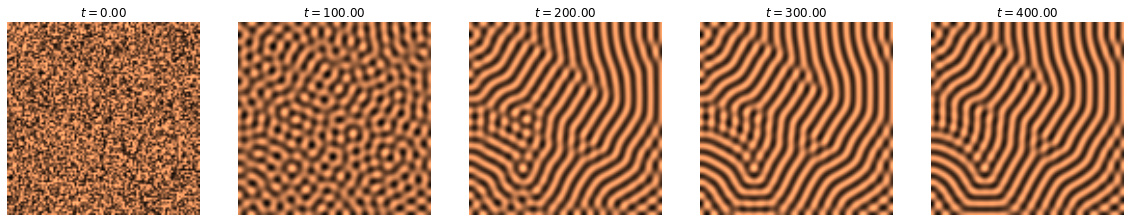

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u) )


#Simulation Loop 
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Part 2 - Stripes orientation with a morphogen gradient

We will change the equation by making $a$ vary with x : 

$
\begin{equation} 
\forall x \in [0,100] : a(x) = -0.2 + \dfrac{x}{500} 
\end{equation}
$

### __Question 2__
> Integrate this varying parameter a to the previous model. What do you observe ?

__*Correction*__ 

100%|██████████| 50000/50000 [00:39<00:00, 1255.11it/s]


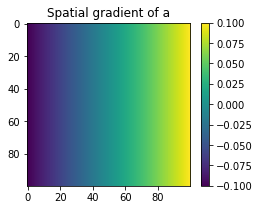

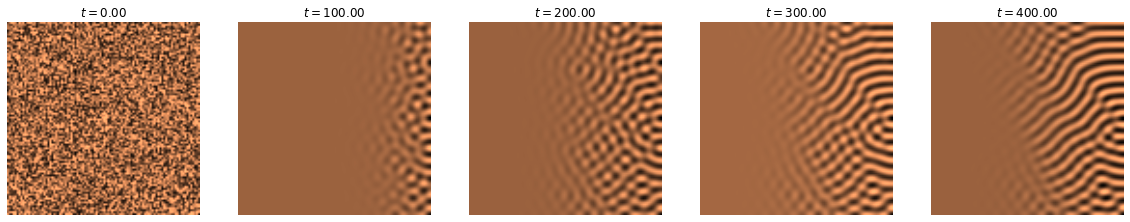

In [27]:
#Simulation Parameters
baselinear = np.linspace(-0.1,0.1,size)
linear_potential = np.zeros((size,size))
for i in range(size):
    linear_potential[i] = baselinear
    
a = linear_potential.copy()
U = np.random.rand(size, size)*(10**-3)

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u))

plt.figure(figsize=(4,3))
plt.imshow(a)
plt.title("Spatial gradient of a")
plt.colorbar()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))


#Simulation Loop
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')


Making $a$ vary with the horizontal dimension orient the stripes along the gradient. However, the left portion goes out of the instability regime, and thus no pattern is produced. This is not a glitch of the simulations, but a real phenotype observed in Hox13/Gli mice, shown in the picture bellow. $k_{hox}$ is an adjusting parameter expressing the progressive removals of all alleles of the paralogous Hox13 genes. Decreasing $k_{hox}$ leads to a higher number of fingers, but also reduces the instability domain, which leads to shorter fingers compared to the wild-type phenotype.

![alt text](Images/Hox_mouse.png "Title")
>R Sheth et al., *Hox Genes Regulate Digit Patterning by Controlling the Wavelength of a Turing-Type Mechanism*, Science, 2012. \
> https://doi.org/10.1126/science.1226804

# Part 3 - Stripes orientation with anisotropic diffusion

We will this time change the equation by replacing the term $(\Delta+1)^2 \text{ by }(\Delta+1)^2 - b \partial_x^2$  : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi + b\partial_x^2\phi - \phi^3
\end{equation}$

With $a=0.1$ and $b =0.1$.

### __Question 3__
> Integrate this varying anisotropic diffusion to the model. What do you observe ?

__*Correction*__ 

This time, the pattern is present everywhere, the anisotropic diffusion does not remove the Turing instability anywhere. 

100%|██████████| 50000/50000 [00:44<00:00, 1115.31it/s]


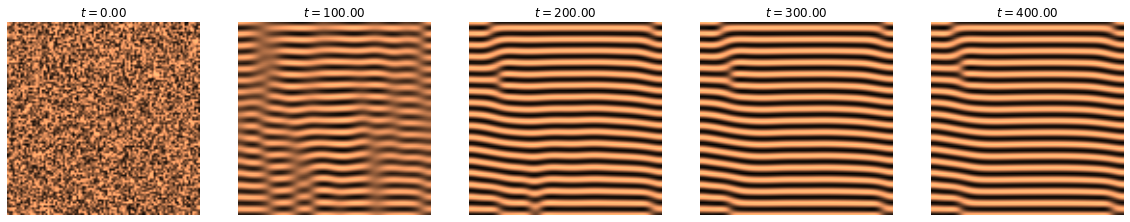

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

#Simulation Parameters
def Xlaplacian2D(u):
    return(-2*u + + np.roll(u,1,axis=1) 
        + np.roll(u,-1,axis=1) )/ (dx ** 2)

U = np.random.rand(size, size)*(10**-3)
a = 0.1
b = 0.1

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u) + b*Xlaplacian2D(u))


#Simulation Loop 
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Part 4 - Stripes orientation with anisotropic growth

We will this time make a pattern that grows. At each timestep, we will make the pattern grow (before integrating the Swift-Hohenberg equation as previously) by distorting the spatial lengthscale $x$ : $\phi(x,y,t+\delta t) = \phi(\dfrac{x}{1+b\delta t},y,t) $

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

### __Question 4__
> Integrate this growth to the model, with $b = 0.001$ and $b = 0.003$. What do you observe ?

__*Correction*__ 

This time, the pattern is present everywhere, the growth does not remove the Turing instability anywhere. With a faster growth the lines are better defined. 

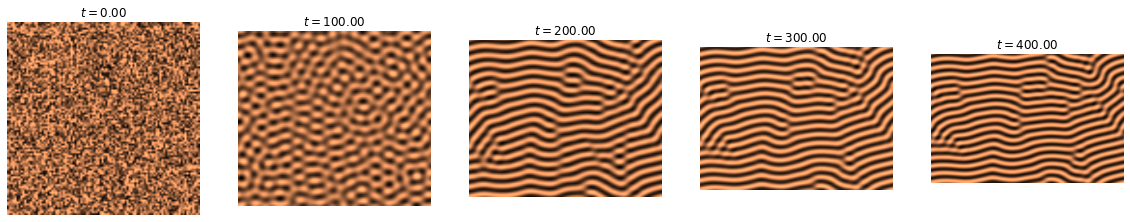

In [33]:
from skimage.transform import resize

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

def show_patterns_long(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear')
    ax.set_axis_off()

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1
b = 0.001

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u))


#Simulation Loop 
current_size = size

for i in tqdm(range(n), total=n):
       
    # We update the variables.
    current_size*=(1+b*dt)
    xsize = int(current_size)
    U = resize(U, (size,xsize))
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

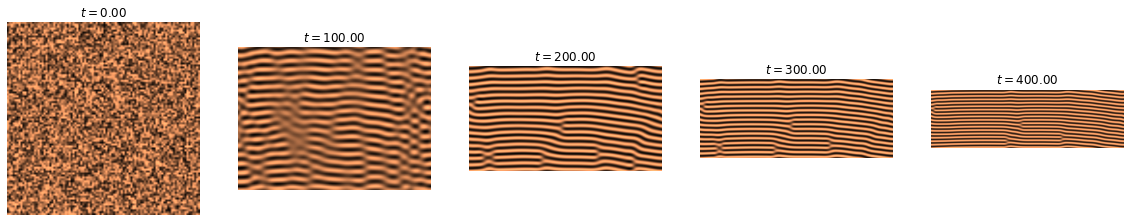

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1
b = 0.003

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u))


#Simulation Loop 
current_size = size

for i in tqdm(range(n), total=n):
    
    # We update the variables.
    current_size*=(1+b*dt)
    xsize = int(current_size)
    U = resize(U, (size,xsize))
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns_long(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Bonus : Stripes versus dots

If we add a term with a quadratic term, stripes will progressively be replaced by dots : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi + \delta \phi^2 - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

### __Question 5__
> Integrate this quadratic term to the model, with $\delta \in [0.1,0.2,0.3]$. What do you observe ?



100%|██████████| 50000/50000 [00:27<00:00, 1840.81it/s]


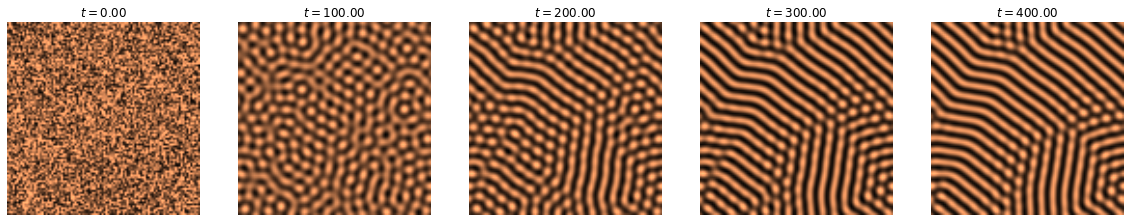

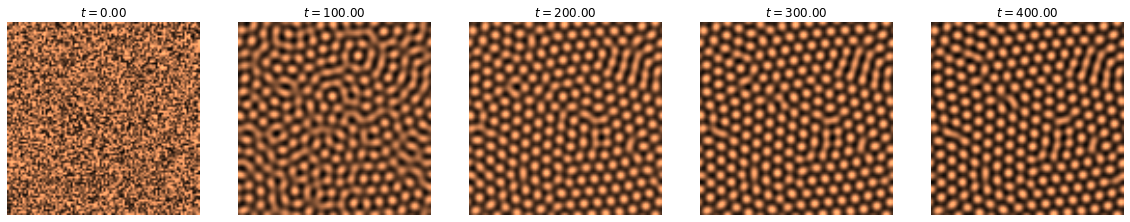

In [8]:
for delta in [0.2, 0.3]:

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    step_plot = n // 5

    #Simulation Parameters
    U = np.random.rand(size, size)*(10**-3)
    a = 0.1

    def f(u):
        return((a-1)*u + delta* u**2 - u**3 - SquareLaplacian(u) - 2*laplacian2D(u) )


    #Simulation Loop 
    for i in tqdm(range(n), total=n):

        # We update the variables.
        U+= dt * f(U)

        # We plot the state of the system at
        # different times.
        if i % step_plot == 0 and i < 5 * step_plot:
            ax = axes.flat[i // step_plot]
            show_patterns(U, ax=ax)
            ax.set_title(f'$t={i * dt:.2f}$')

### About dots and stripes

<img src="Images/Dot_stripes.png" alt="drawing" width="1000"/>

Dots and stripes seems to be all these models are about. However, they can be combined together in a model where dots repressed stripes to obtain a wide variety of patterns. They correspond well to many phenotypes observed in-vivo. 

> Jake Cornwall Scoones, Tom W Hiscock, *A dot-stripe Turing model of joint patterning in the tetrapod limb*, Development, 2020. \
> https://doi.org/10.1242/dev.183699

<img src="Images/Patterns_dot_stripes.png" alt="drawing" width="1000"/>

As you can see, limb development in tetrapods is a widely studied morphogenetic process that can be perturbed in many ways, offering insights about the generical mechanisms involved in development as well as in evolution. For an accessible introduction to the field, see :

> Denis Duboule, cours du College de France. _Évolution et développement (évo-dévo) : Une histoire, quelques principes et des exemples actuels_ \
> https://www.college-de-france.fr/site/denis-duboule/course-2017-2018.htm.

## Misc : Gradient in $\delta$

100%|██████████| 50000/50000 [00:27<00:00, 1809.12it/s]


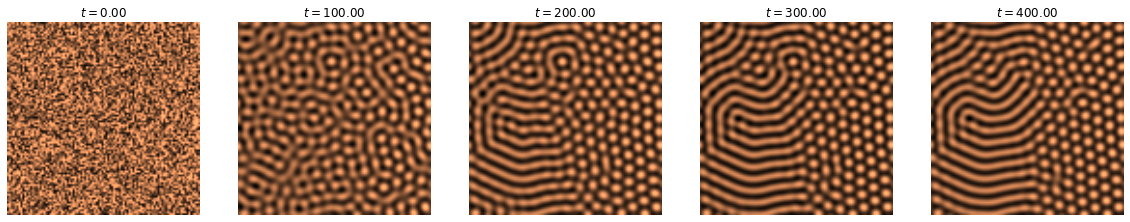

In [13]:
baselinear = np.linspace(0,0.5,size)
linear_potential = np.zeros((size,size))
for i in range(size):
    linear_potential[i] = baselinear
    
delta = linear_potential.copy()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1

def f(u):
    return((a-1)*u + delta* u**2 - u**3 - SquareLaplacian(u) - 2*laplacian2D(u) )


#Simulation Loop 
for i in tqdm(range(n), total=n):

    # We update the variables.
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')



## Misc : Gradient in $y$ for a and anisotropic growth in $x$

We can combine previous mechanisms and try to reproduce patterns seen in nature. 

This is only to play with the model and certainly not the real molecular mechanism !


> Shigeru Kondo & Rihito Asai, *A reaction–diffusion wave on the skin of the marine angelfish Pomacanthus*, Nature, 1995. \
> https://doi.org/10.1038/376765a0

<img src="Images/Pomacanthus_imperator.png" alt="drawing" width="300"/>

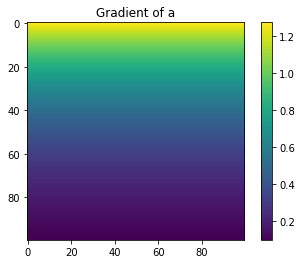

In [55]:
#Simulation Parameters
baseexp = np.linspace(2.,0.,size)
potential = np.zeros((size,size))
for i in range(size):
    potential[:,i] = (np.exp(baseexp)-1+ 0.1*(2*np.exp(1)))/(2*np.exp(1))
    
a = potential.copy()
plt.figure()
plt.imshow(a)
plt.title("Gradient of a")
plt.colorbar()

100%|██████████| 50000/50000 [02:12<00:00, 377.90it/s]


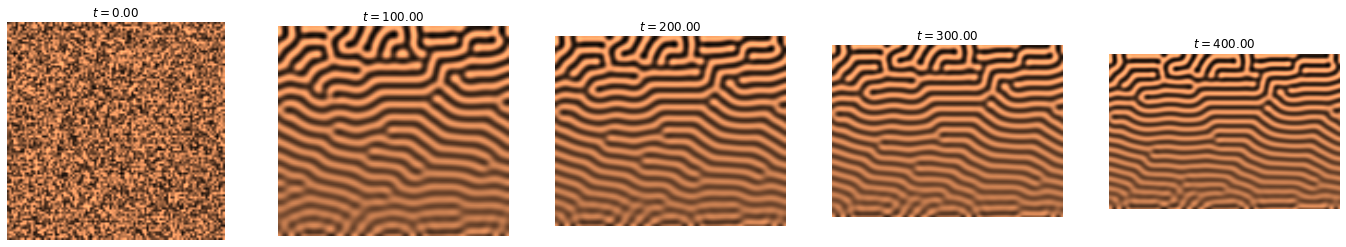

In [56]:
from skimage.transform import resize

fig, axes = plt.subplots(1, 5, figsize=(24, 4))
step_plot = n // 5

def show_patterns_long(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear')
    ax.set_axis_off()

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
b = 0.001

def f(u):
    return((a-1)*u - u**3 - SquareLaplacian(u) - 2*laplacian2D(u))


#Simulation Loop 
current_size = size

for i in tqdm(range(n), total=n):
       
    # We update the variables.
    current_size*=(1+b*dt)
    xsize = int(current_size)
    U = resize(U, (size,xsize))
    a = resize(a, (size,xsize))
    U+= dt * f(U)

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns_long(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')
        


### Conclusion 

Though the microscopic factor responsible for the turing instability can vary widly, these mechanisms studied previously are very general and can be applied on many systems. For a nice example on developmental biology showing how birds evolved a special organ to vocalize, see :

> E. Kingsley et al., *Identity and novelty in the avian syrinx*, PNAS, 2018. \
> https://doi.org/10.1073/pnas.1804586115


![alt text](Images/Bird_patterning.png "Title")


